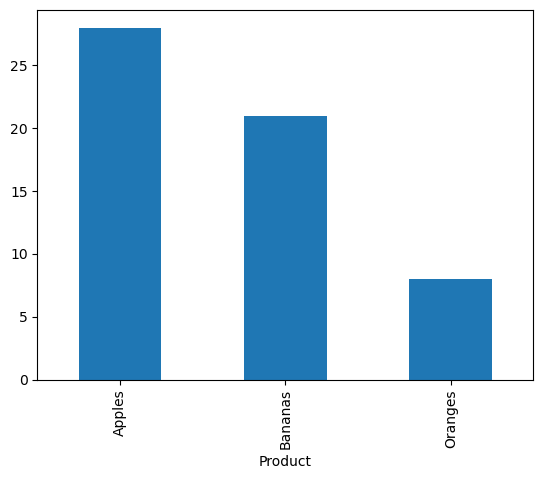

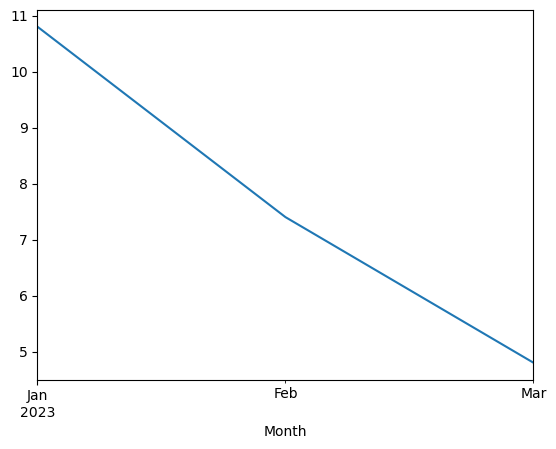

In [ ]:
# @author: mireilla
"""
"""
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('shopping.csv', parse_dates=['Date'], dayfirst=True)

# Handling Missing Values
df.fillna({'Product': 'Unknown', 'Quantity': 0, 'Price': 0.0, 'Total': 0.0}, inplace=True) #inplace直接对这个进行替换

# Calculate Total
df['Total'] = df['Quantity'] * df['Price']

# Bar Chart for Product Sales
product_sales = df.groupby('Product')['Quantity'].sum()
product_sales.plot(kind='bar')
plt.show()
'''
使用 groupby('Product') 按产品分组。
对每个产品的 Quantity 求和。
'''
# Line Chart for Sales Over Time
df['Month'] = df['Date'].dt.to_period('M')#这句话的作用是将 Date 列中的日期转换为月份的周期（Period），并将其存储在一个新的列 Month 中
monthly_sales = df.groupby('Month')['Total'].sum()

monthly_sales.plot(kind='line')
plt.show()


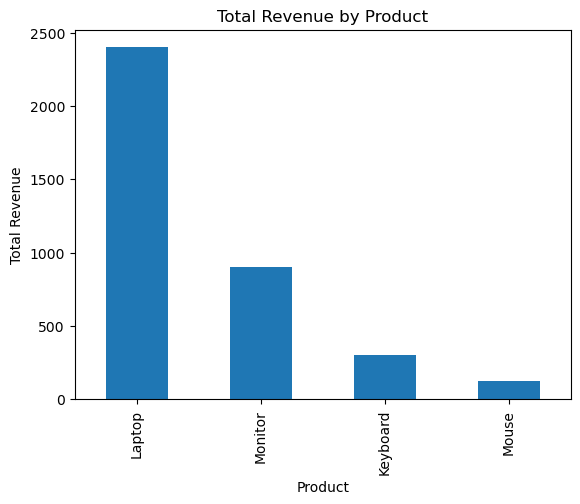

The customer with the highest spending is CustomerID: 1001, spending: 2400.0


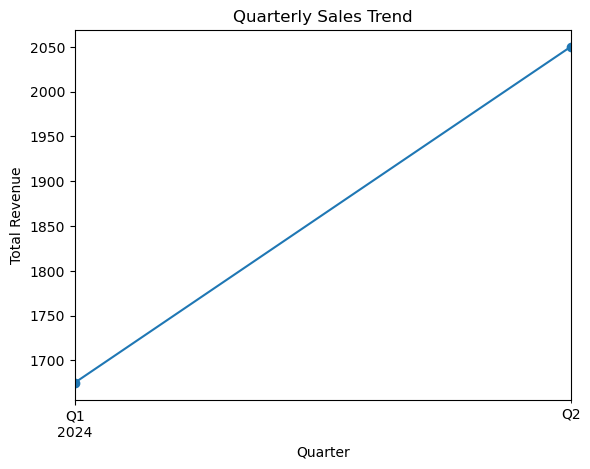

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据
df = pd.read_csv('orders.csv', parse_dates=['OrderDate'])

# 计算每个产品的总销售收入
df['Revenue'] = df['Quantity'] * df['UnitPrice']
product_revenue = df.groupby('Product')['Revenue'].sum()

# 绘制柱状图展示每个产品的总收入
product_revenue.sort_values(ascending=False).plot(kind='bar', title="Total Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Total Revenue")
plt.show()

# 计算每位客户的总消费金额
customer_spending = df.groupby('CustomerID')['Revenue'].sum()

# 找出消费金额最高的客户
top_customer = customer_spending.idxmax()
print(f"The customer with the highest spending is CustomerID: {top_customer}, spending: {customer_spending[top_customer]}")

# 将订单按季度分组
df['Quarter'] = df['OrderDate'].dt.to_period('Q')
quarterly_revenue = df.groupby('Quarter')['Revenue'].sum()

# 绘制折线图展示季度销售趋势
quarterly_revenue.plot(kind='line', marker='o', title="Quarterly Sales Trend")
plt.xlabel("Quarter")
plt.ylabel("Total Revenue")
plt.show()
